#Reinforcement Learning Tools

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB or IS_KAGGLE:
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents pyvirtualdisplay gym[atari,box2d]
    !pip install atari-py

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,258 kB]
Hit:12 http://ppa.launchpad.net/cra

#Using TF-Agents to Beat Breakout

Let's use TF-Agents to create an agent that will learn to play Breakout. We will use the Deep Q Learning algorythm.

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/

--2021-08-03 08:05:36--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11128004 (11M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  10.61M   731KB/s    in 15s     

2021-08-03 08:05:52 (706 KB/s) - ‘Roms.rar’ saved [11128004/11128004]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/HC ROMS.zip                                      36%  OK 
Extracting  /content/ROM/ROMS.zip                                         74% 99%  OK 
All OK
copying adventure.bin from ROMS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin fr

In [4]:
from tf_agents.environments import suite_gym

env = suite_gym.load("Breakout-v4")
env

In [5]:
env.gym

In [6]:
env.seed(42)
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})

In [7]:
env.step(1) #Fire

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)})

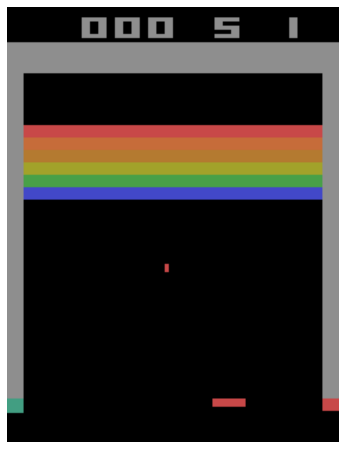

In [8]:
img = env.render(mode='rgb_array')
plt.figure(figsize=(6,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
env.current_time_step()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)})

#Environment Specifications

In [29]:
env.observation_spec()

BoundedArraySpec(shape=(84, 84, 4), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [11]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [12]:
env.time_step_spec()

TimeStep(
{'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')})

#Environment Wrappers

We gonna wrap a TF-Agents environments in a TF-Agents wrapper

In [13]:
from tf_agents.environments.wrappers import ActionRepeat
repeating_env = ActionRepeat(env, times=4)
repeating_env

In [14]:
repeating_env.unwrapped

List of avaiable wrappers:

In [15]:
import tf_agents.environments.wrappers

for name in dir(tf_agents.environments.wrappers):
  obj = getattr(tf_agents.environments.wrappers, name)
  if hasattr(obj, "__base__") and issubclass(obj, tf_agents.environments.wrappers.PyEnvironmentBaseWrapper):
    print("{:27s} {}".format(name, obj.__doc__.split("\n")[0]))

ActionClipWrapper           Wraps an environment and clips actions to spec before applying.
ActionDiscretizeWrapper     Wraps an environment with continuous actions and discretizes them.
ActionOffsetWrapper         Offsets actions to be zero-based.
ActionRepeat                Repeates actions over n-steps while acummulating the received reward.
ExtraDisabledActionsWrapper Adds extra unavailable actions.
FlattenObservationsWrapper  Wraps an environment and flattens nested multi-dimensional observations.
GoalReplayEnvWrapper        Adds a goal to the observation, used for HER (Hindsight Experience Replay).
HistoryWrapper              Adds observation and action history to the environment's observations.
ObservationFilterWrapper    Filters observations based on an array of indexes.
OneHotActionWrapper         Converts discrete action to one_hot format.
PerformanceProfiler         End episodes after specified number of steps.
PyEnvironmentBaseWrapper    PyEnvironment wrapper forwards calls

The `suite_gym.load()` function can create an env and wrap it for you both with TF-Agents environment wrappers and Gym environment wrappers

In [30]:
from functools import partial
from gym.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    "Breakout-v4",
    gym_env_wrappers=[partial(TimeLimit, max_episode_steps=10000)],
    env_wrappers=[partial(ActionRepeat, times=4)],
)

In [17]:
limited_repeating_env

In [18]:
limited_repeating_env.unwrapped

To create an Atari Breakout environment, and wrap it to apply the default Atari preprocessing steps:

**Warning**: Breakout requires the player to press the FIRE button at the start of the game and after each life lost. The agent may take a very long time learning this because at first it seems that pressing FIRE just means losing faster. To speed up training considerably, we create and use a subclass of the `AtariPreprocessing` wrapper class called `AtariPreprocessingWithAutoFire` which presses FIRE automatically at the start of the game and after each lift lost. 

In [31]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4

max_episode_steps = 27000 # <=> 108k ALE frames since 1 step = 4 frames
environment_name = "BreakoutNoFrameskip-v4"

class AtariPreprocessingWithAutoFire(AtariPreprocessing):
    def reset(self, **kwargs):
        obs = super().reset(**kwargs)
        super().step(1) # FIRE to start
        return obs
    def step(self, action):
        lives_before_action = self.ale.lives()
        obs, rewards, done, info = super().step(action)
        if self.ale.lives() < lives_before_action and not done:
            super().step(1) # FIRE to start after life lost
        return obs, rewards, done, info

env = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessingWithAutoFire, FrameStack4])

In [20]:
env

Play few steps to see what happens:

In [21]:
env.seed(42)
env.reset()
for _ in range(4):
  time_step = env.step(3) #LEFT

In [32]:
def plot_observation(obs):
    # Since there are only 3 color channels, you cannot display 4 frames
    # with one primary color per frame. So this code computes the delta between
    # the current frame and the mean of the other frames, and it adds this delta
    # to the red and blue channels to get a pink color for the current frame.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

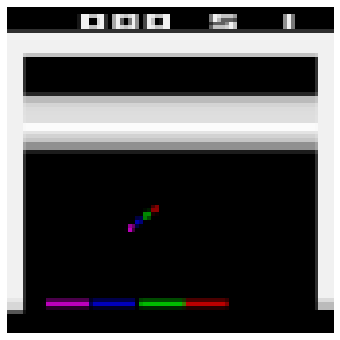

In [39]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
plt.show()

This is preprocessed breakout plot.
Convert the Python environment to a TF environment:

In [38]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment

tf_env = TFPyEnvironment(env)

#Creating the DQN

Create a small class to normalize the observations. Images ar stored using bytes from 0 to 255 to use less RAM but we want to pass floats from 0.0 to 1.0 to the neural network.

Create a Q=Network

In [37]:
from tf_agents.networks.q_network import QNetwork

preprocessing_layer = keras.layers.Lambda(
                          lambda obs: tf.cast(obs, np.float32) / 255.)
conv_layer_params=[(32, (8, 8), 4), (64, (4, 4), 2), (64, (3, 3), 1)]
fc_layer_params=[512]

q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    preprocessing_layers=preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params)

Create the DQN Agent

In [41]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent

train_step = tf.Variable(0)
update_period = 4 # run a training step every 4 collect steps
optimizer = keras.optimizers.RMSprop(lr=2.5e-4, rho=0.95, momentum=0.0,
                                     epsilon=0.00001, centered=True)
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0, # initial ε
    decay_steps=250000 // update_period, # <=> 1,000,000 ALE frames
    end_learning_rate=0.01) # final ε
agent = DqnAgent(tf_env.time_step_spec(),
                 tf_env.action_spec(),
                 q_network=q_net,
                 optimizer=optimizer,
                 target_update_period=2000, # <=> 32,000 ALE frames
                 td_errors_loss_fn=keras.losses.Huber(reduction="none"),
                 gamma=0.99, # discount factor
                 train_step_counter=train_step,
                 epsilon_greedy=lambda: epsilon_fn(train_step))
agent.initialize()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Create the replay buffer (this will use a lot of RAM so if you get `out-of-memomy-error` please reduce its size.

In [42]:
from tf_agents.replay_buffers import tf_uniform_replay_buffer

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=100000) # reduce if OOM error

replay_buffer_observer = replay_buffer.add_batch

Create a simple custom observer that counts and displays the number of times it is called (exept when it is passed a trajectory that represents the boundary between two episodes, as this does not count as a step):

In [58]:
class ShowProgress:
    def __init__(self, total):
        self.counter = 0
        self.total = total
    def __call__(self, trajectory):
        if not trajectory.is_boundary():
            self.counter += 1
        if self.counter % 100 == 0:
            print("\r{}/{}".format(self.counter, self.total), end="")

Let's add some training metrics:

In [59]:
from tf_agents.metrics import tf_metrics
train_metrics = [
                  tf_metrics.NumberOfEpisodes(),
                  tf_metrics.EnvironmentSteps(),
                  tf_metrics.AverageReturnMetric(),
                  tf_metrics.AverageEpisodeLengthMetric(),
]

In [60]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [61]:
from tf_agents.eval.metric_utils import log_metrics
import logging
logging.getLogger().setLevel(logging.INFO)
log_metrics(train_metrics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


Create the collect driver:

In [62]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

collect_driver = DynamicStepDriver(
    tf_env,
    agent.collect_policy,
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=update_period) # collect 4 steps for each training iteration

Collect the initial experiences before training

In [63]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(),
                                        tf_env.action_spec())
init_driver = DynamicStepDriver(
    tf_env,
    initial_collect_policy,
    observers=[replay_buffer.add_batch, ShowProgress(20000)],
    num_steps=20000) # <=> 80,000 ALE frames
final_time_step, final_policy_state = init_driver.run()

20000/20000

Let's sample 2 sub-episodes with 3 time steps each and display them:


`replay_buffer.get_next()` is deprecated. We must use `replay_buffer.as_dataset(..., single_deterministic_pass=False)` instead.

In [65]:
tf.random.set_seed(9) #chosen to show an example of trajectory at the end of an episode
# trajectories, buffer info = replay_buffer.get_next (get next is depricated)

trajectories, buffer_info = next(iter(replay_buffer.as_dataset(
    sample_batch_size=2,
    num_steps=3,
    single_deterministic_pass=False
)))

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [66]:
trajectories._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [67]:
trajectories.observation.shape

TensorShape([2, 3, 84, 84, 4])

In [68]:
from tf_agents.trajectories.trajectory import to_transition
time_steps, action_steps, next_time_steps = to_transition(trajectories)
time_steps.observation.shape

TensorShape([2, 2, 84, 84, 4])

In [69]:
trajectories.step_type.numpy()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

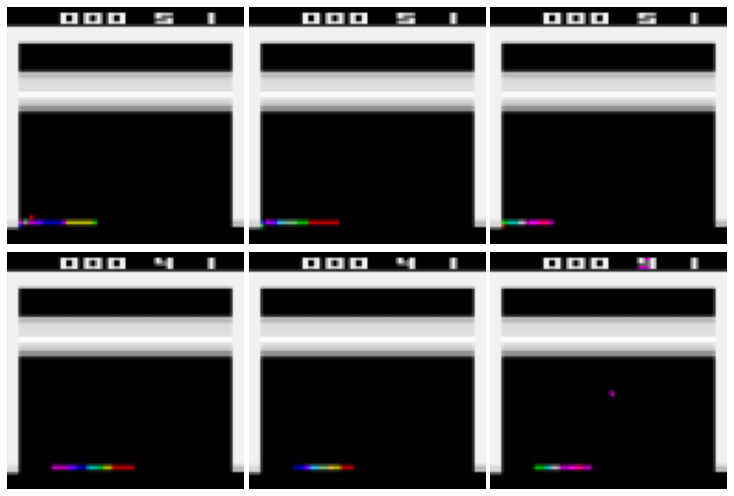

In [70]:
plt.figure(figsize=(10, 6.8))
for row in range(2):
  for col in range(3):
    plt.subplot(2, 3, row * 3 + col + 1)
    plot_observation(trajectories.observation[row,col].numpy())
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0.02)
plt.show()

Creating the dataset

In [72]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3).prefetch(3)

Convert the main functions to TF Functions for better performance:

In [73]:
from tf_agents.utils.common import function
collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

The main loop for run agent

In [76]:
def train_agent(n_iterations):
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(tf_env.batch_size)
    iterator = iter(dataset)
    for iteration in range(n_iterations):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        print("\r{} loss:{:.5f}".format(
            iteration, train_loss.loss.numpy()), end="")
        if iteration % 1000 == 0:
            log_metrics(train_metrics)

Run the cell to train agent for 50 000 steps. then look at its behaviour by running the following cell. You can run these two cells as many times as your wish. The agent will keep improving! It will likely take over 200 000 iterations for the agent to become a resonably good.

In [77]:
train_agent(n_iterations=50000)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 8
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


999 loss:0.00026

INFO:absl: 
		 NumberOfEpisodes = 23
		 EnvironmentSteps = 4008
		 AverageReturn = 1.7999999523162842
		 AverageEpisodeLength = 188.39999389648438


2000 loss:0.00013

INFO:absl: 
		 NumberOfEpisodes = 49
		 EnvironmentSteps = 8008
		 AverageReturn = 1.7999999523162842
		 AverageEpisodeLength = 186.5


3000 loss:0.00730

INFO:absl: 
		 NumberOfEpisodes = 75
		 EnvironmentSteps = 12008
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 166.39999389648438


3999 loss:0.00105

INFO:absl: 
		 NumberOfEpisodes = 101
		 EnvironmentSteps = 16008
		 AverageReturn = 0.4000000059604645
		 AverageEpisodeLength = 138.1999969482422


4999 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 128
		 EnvironmentSteps = 20008
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 146.6999969482422


5999 loss:0.00310

INFO:absl: 
		 NumberOfEpisodes = 153
		 EnvironmentSteps = 24008
		 AverageReturn = 1.7000000476837158
		 AverageEpisodeLength = 182.89999389648438


6999 loss:0.00049

INFO:absl: 
		 NumberOfEpisodes = 178
		 EnvironmentSteps = 28008
		 AverageReturn = 0.4000000059604645
		 AverageEpisodeLength = 135.60000610351562


7999 loss:0.00106

INFO:absl: 
		 NumberOfEpisodes = 205
		 EnvironmentSteps = 32008
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 141.8000030517578


8998 loss:0.00003

INFO:absl: 
		 NumberOfEpisodes = 232
		 EnvironmentSteps = 36008
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 149.5


9999 loss:0.00018

INFO:absl: 
		 NumberOfEpisodes = 258
		 EnvironmentSteps = 40008
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 154.10000610351562


10999 loss:0.00018

INFO:absl: 
		 NumberOfEpisodes = 281
		 EnvironmentSteps = 44008
		 AverageReturn = 1.5
		 AverageEpisodeLength = 176.8000030517578


11999 loss:0.00109

INFO:absl: 
		 NumberOfEpisodes = 305
		 EnvironmentSteps = 48008
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 179.1999969482422


13000 loss:0.00037

INFO:absl: 
		 NumberOfEpisodes = 328
		 EnvironmentSteps = 52008
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 160.0


13999 loss:0.00016

INFO:absl: 
		 NumberOfEpisodes = 350
		 EnvironmentSteps = 56008
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 168.39999389648438


14999 loss:0.00001

INFO:absl: 
		 NumberOfEpisodes = 376
		 EnvironmentSteps = 60008
		 AverageReturn = 0.5
		 AverageEpisodeLength = 135.60000610351562


15999 loss:0.00046

INFO:absl: 
		 NumberOfEpisodes = 403
		 EnvironmentSteps = 64008
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 161.0


16999 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 428
		 EnvironmentSteps = 68008
		 AverageReturn = 1.7999999523162842
		 AverageEpisodeLength = 183.8000030517578


17999 loss:0.00069

INFO:absl: 
		 NumberOfEpisodes = 452
		 EnvironmentSteps = 72008
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 160.0


18999 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 476
		 EnvironmentSteps = 76008
		 AverageReturn = 1.7000000476837158
		 AverageEpisodeLength = 167.10000610351562


19999 loss:0.00185

INFO:absl: 
		 NumberOfEpisodes = 502
		 EnvironmentSteps = 80008
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 167.3000030517578


20999 loss:0.00023

INFO:absl: 
		 NumberOfEpisodes = 525
		 EnvironmentSteps = 84008
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 172.1999969482422


21999 loss:0.01913

INFO:absl: 
		 NumberOfEpisodes = 547
		 EnvironmentSteps = 88008
		 AverageReturn = 2.0
		 AverageEpisodeLength = 191.8000030517578


22998 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 570
		 EnvironmentSteps = 92008
		 AverageReturn = 2.0
		 AverageEpisodeLength = 187.10000610351562


23999 loss:0.00024

INFO:absl: 
		 NumberOfEpisodes = 592
		 EnvironmentSteps = 96008
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 188.89999389648438


24999 loss:0.00080

INFO:absl: 
		 NumberOfEpisodes = 618
		 EnvironmentSteps = 100008
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 159.6999969482422


25999 loss:0.00101

INFO:absl: 
		 NumberOfEpisodes = 642
		 EnvironmentSteps = 104008
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 167.5


26999 loss:0.00002

INFO:absl: 
		 NumberOfEpisodes = 666
		 EnvironmentSteps = 108008
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 167.60000610351562


27999 loss:0.00099

INFO:absl: 
		 NumberOfEpisodes = 692
		 EnvironmentSteps = 112008
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 159.10000610351562


28999 loss:0.00028

INFO:absl: 
		 NumberOfEpisodes = 713
		 EnvironmentSteps = 116008
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 171.89999389648438


29999 loss:0.00433

INFO:absl: 
		 NumberOfEpisodes = 737
		 EnvironmentSteps = 120008
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 169.6999969482422


30999 loss:0.00020

INFO:absl: 
		 NumberOfEpisodes = 759
		 EnvironmentSteps = 124008
		 AverageReturn = 1.5
		 AverageEpisodeLength = 172.3000030517578


31999 loss:0.02385

INFO:absl: 
		 NumberOfEpisodes = 781
		 EnvironmentSteps = 128008
		 AverageReturn = 1.5
		 AverageEpisodeLength = 170.5


33000 loss:0.00145

INFO:absl: 
		 NumberOfEpisodes = 804
		 EnvironmentSteps = 132008
		 AverageReturn = 1.7000000476837158
		 AverageEpisodeLength = 180.8000030517578


33998 loss:0.00025

INFO:absl: 
		 NumberOfEpisodes = 823
		 EnvironmentSteps = 136008
		 AverageReturn = 3.0
		 AverageEpisodeLength = 210.0


34999 loss:0.00039

INFO:absl: 
		 NumberOfEpisodes = 841
		 EnvironmentSteps = 140008
		 AverageReturn = 3.0
		 AverageEpisodeLength = 227.8000030517578


35999 loss:0.00438

INFO:absl: 
		 NumberOfEpisodes = 861
		 EnvironmentSteps = 144008
		 AverageReturn = 2.4000000953674316
		 AverageEpisodeLength = 209.0


37000 loss:0.00043

INFO:absl: 
		 NumberOfEpisodes = 881
		 EnvironmentSteps = 148008
		 AverageReturn = 3.5
		 AverageEpisodeLength = 215.0


37999 loss:0.00850

INFO:absl: 
		 NumberOfEpisodes = 901
		 EnvironmentSteps = 152008
		 AverageReturn = 3.799999952316284
		 AverageEpisodeLength = 226.5


38999 loss:0.00274

INFO:absl: 
		 NumberOfEpisodes = 918
		 EnvironmentSteps = 156008
		 AverageReturn = 2.299999952316284
		 AverageEpisodeLength = 193.3000030517578


39998 loss:0.00075

INFO:absl: 
		 NumberOfEpisodes = 934
		 EnvironmentSteps = 160008
		 AverageReturn = 4.5
		 AverageEpisodeLength = 273.0


40999 loss:0.00050

INFO:absl: 
		 NumberOfEpisodes = 951
		 EnvironmentSteps = 164008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 234.1999969482422


41999 loss:0.01251

INFO:absl: 
		 NumberOfEpisodes = 968
		 EnvironmentSteps = 168008
		 AverageReturn = 4.199999809265137
		 AverageEpisodeLength = 250.6999969482422


42999 loss:0.00118

INFO:absl: 
		 NumberOfEpisodes = 985
		 EnvironmentSteps = 172008
		 AverageReturn = 4.900000095367432
		 AverageEpisodeLength = 263.6000061035156


43999 loss:0.00335

INFO:absl: 
		 NumberOfEpisodes = 1001
		 EnvironmentSteps = 176008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 258.5


44999 loss:0.00123

INFO:absl: 
		 NumberOfEpisodes = 1016
		 EnvironmentSteps = 180008
		 AverageReturn = 5.5
		 AverageEpisodeLength = 276.8999938964844


45999 loss:0.00334

INFO:absl: 
		 NumberOfEpisodes = 1030
		 EnvironmentSteps = 184008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 281.6000061035156


46999 loss:0.00145

INFO:absl: 
		 NumberOfEpisodes = 1046
		 EnvironmentSteps = 188008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 235.5


47999 loss:0.00362

INFO:absl: 
		 NumberOfEpisodes = 1062
		 EnvironmentSteps = 192008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 252.39999389648438


48999 loss:0.05530

INFO:absl: 
		 NumberOfEpisodes = 1075
		 EnvironmentSteps = 196008
		 AverageReturn = 8.399999618530273
		 AverageEpisodeLength = 326.79998779296875


49999 loss:0.01246

In [82]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

In [80]:
def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [83]:
frames = []
def save_frames(trajectory):
    global frames
    frames.append(tf_env.pyenv.envs[0].render(mode="rgb_array"))

watch_driver = DynamicStepDriver(
    tf_env,
    agent.policy,
    observers=[save_frames, ShowProgress(1000)],
    num_steps=1000)
final_time_step, final_policy_state = watch_driver.run()

plot_animation(frames)

900/1000

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


1000/1000